In [24]:
import pandas as pd
import numpy as np
from prophet import Prophet

start_date = '2019-01-01'
end_date = '2022-01-01'

dates = pd.date_range(start=start_date, end=end_date, freq='D')
unix_dates = np.array([int(pd.Timestamp(d).timestamp()) for d in dates])
# Recreate a DatetimeIndex with a specific frequency

freq = 'D'  # Monthly frequency
date_rng = pd.date_range(start=start_date, end=end_date, freq=freq)

prices = np.sin(unix_dates)

data = pd.DataFrame({'ds': date_rng, 'y': prices})

In [25]:
prices_diff = np.diff(prices)

In [26]:
len(prices)

1097

In [27]:
len(prices_diff)

1096

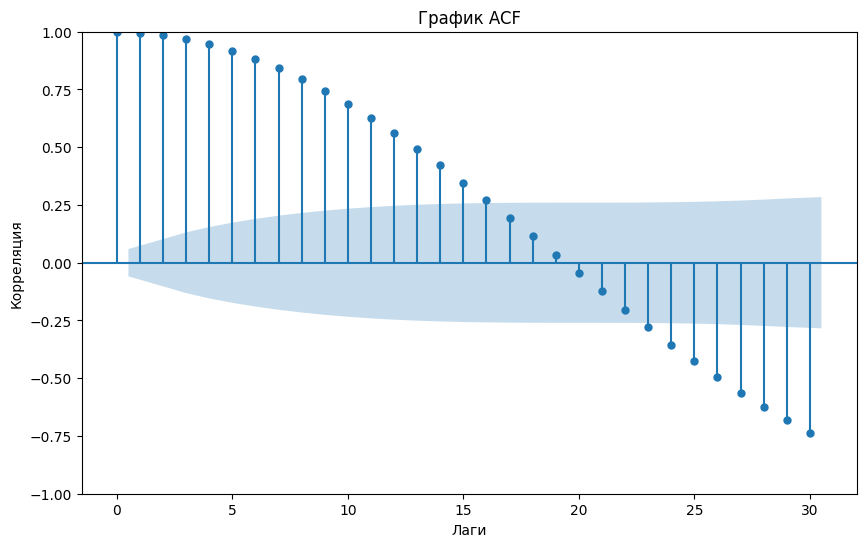

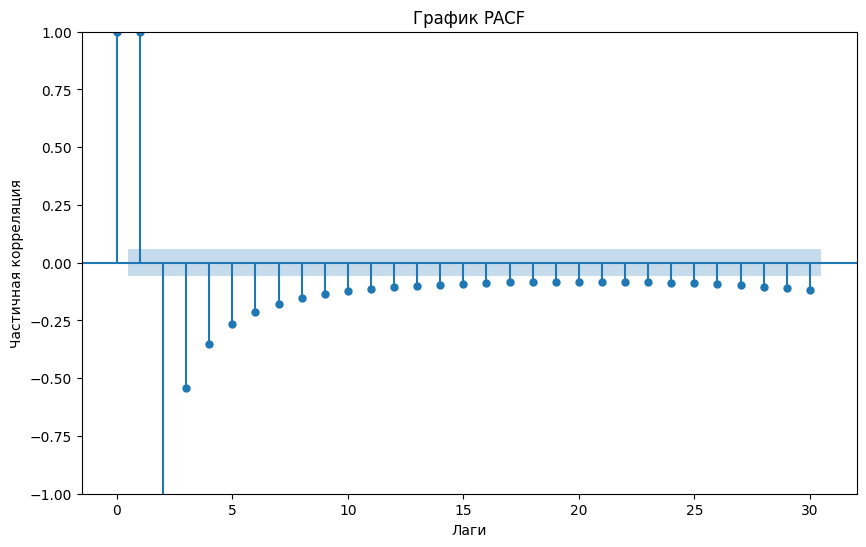

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
# Построение графика автокорреляционной функции (ACF)
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(prices_diff, lags=30, ax=ax)  # Установите значение lags в соответствии с вашими потребностями
plt.xlabel('Лаги')
plt.ylabel('Корреляция')
plt.title('График ACF')
plt.show()
# Построение графика частичной автокорреляционной функции (PACF)
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(prices_diff, lags=30, ax=ax)  # Установите значение lags в соответствии с вашими потребностями
plt.xlabel('Лаги')
plt.ylabel('Частичная корреляция')
plt.title('График PACF')
plt.show()

In [29]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(prices_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1196196525429079.0
p-value: 0.0


In [30]:
train_size = int(len(prices_diff) * 0.7)
test_size = len(prices_diff) - train_size

In [31]:
model_data = pd.DataFrame({'Price': prices_diff[0:train_size], 'Date': date_rng[1:train_size + 1]})
model_data = model_data.set_index('Date', inplace = False)
model_data.head(10)

,Price
Date,
2019-01-02,-0.034774
2019-01-03,-0.028716
2019-01-04,-0.022470
2019-01-05,-0.016076
2019-01-06,-0.009575
2019-01-07,-0.003012
2019-01-08,0.003571
2019-01-09,0.010131
2019-01-10,0.016624


In [32]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(model_data["Price"], order = (2, 1, 1))

C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [33]:
model_fit = model.fit()

C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Skiv2\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
forecast = model_fit.forecast(steps = test_size) 

In [35]:
len(forecast.values)

329

In [36]:
temp_val = [model_data["Price"][-330]]
temp_val.extend(forecast.values)
temp_val = np.cumsum(temp_val)

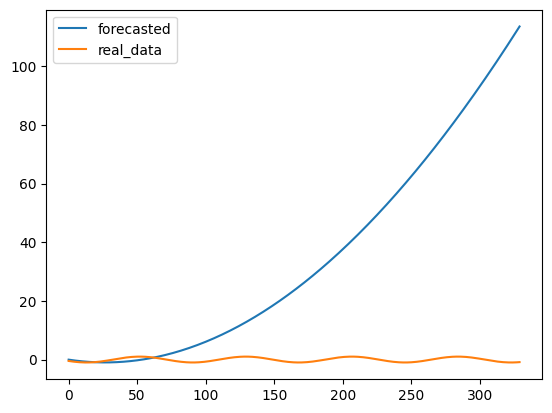

In [37]:
plt.plot(temp_val, label = "forecasted")
plt.plot(prices[train_size:], label = "real_data")
plt.legend()

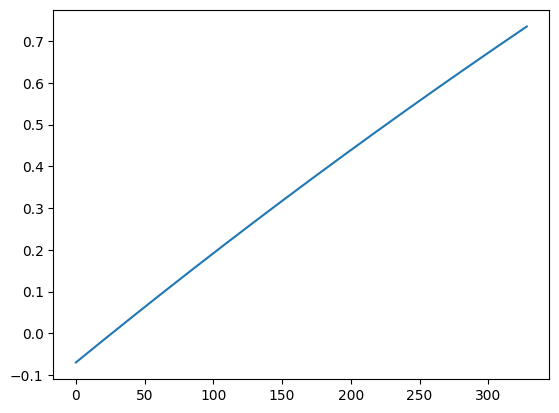

In [38]:
plt.plot(forecast.values, label = "forecasted")